https://www.youtube.com/watch?v=sM2C-SsREgM
tilføj data generators,
confusion matrix + dokumentation og diskussionsspgs.

# OLA 4
<img src="./images/cnnimages/catordog.gif" alt="Showcasing objective" title="CatorDog" width="600" />

The project work involves solving the following tasks:
1. Obtaining, importing, and pre-processing of data, appropriate for supervised machine learning - classification of images. We use the data from the following [link](https://github.com/datsoftlyngby/soft2024spring-ai/tree/main/Data/CNN).
2. Building and training a model of convolutional neural network (CNN) for recognition of patterns and classification of images based on these patterns.
3. Validating and testing the model with both labelled and not labelled images.
4. Assessing the quality of the model by means of proper measures and criteria.
5. Discussing the process and the product of the project by answering the questions:
- Based on your experience, how would you define ANN and CNN?
- Which hyper-parameters of the CNN architecture have you fine-tuned?
- Which is the role of the activation functions in ANN? Which of them you have implemented?Illustrate them.
- Can you see any advantages and disadvantages of ANN and CNN used for classification in
comparison to the other classification algorithms you are familiar with? Give some examples.

## Part 1 - Data Description
Two folders: **train** and **test** containing training and test images of dogs and cats each separated in their own folders **cats** and **dogs**.
Training folder has 20000 images in total - 10000 dogs and 10000 cats. We would like our model to predict whether a new image input contains either a dog or a cat. If an image contains a dog the model will predict a value closer to 1 and for cats closer to 0. 

## Part 2 - Installing & loading the libraries we need

In [7]:
import os
os.getcwd()

'/Users/owaisdashti/Software2425/AI_Assignments/OLA4'

In [15]:
import sys
sys.version

'3.12.3 (main, Apr  9 2024, 08:09:14) [Clang 15.0.0 (clang-1500.3.9.4)]'

In [16]:
!python3 -V

Python 3.12.3


In [5]:
#!pip3 install tensorflow --break-system-packages

In [47]:
import glob
from PIL import Image
import cv2
import tensorflow as tf
import keras
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as ran
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

In [18]:
# TF Version
tf.__version__

'2.16.1'

## Part 3 - Loading the training and testing data

In [5]:
DIRECTORY = "./train"
TEST_DIRECTORY = "./test"
CATEGORIES = ["cats", "dogs"]
data = []
test_data = []
img_size = 128

In [8]:
# READING TRAINING DATA
for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category) # 0 = cats, 1 = dogs
    
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB) # Convert to RGB (cv2 loads images as BGR)
        img_arr = cv2.resize(img_arr, (img_size, img_size)) # Resize since the images vary in size
        data.append([img_arr, label]) # Adding the image array and its label to the data list

In [9]:
# READING TESTING DATA
for category in CATEGORIES:
    folder = os.path.join(TEST_DIRECTORY, category)
    label = CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
        img_arr = cv2.resize(img_arr, (img_size, img_size))
        test_data.append([img_arr, label])

In [10]:
print("Training data length:", len(data))
print("Testing data length:", len(test_data))

Training data length: 20000
Testing data length: 5000


We want to shuffle our data to ensure some randomness

In [11]:
np.random.shuffle(data)
np.random.shuffle(test_data)

In [12]:
data[0]

[array([[[142, 145, 154],
         [140, 144, 151],
         [139, 142, 148],
         ...,
         [ 29,  30,  24],
         [ 86,  86,  80],
         [ 80,  81,  74]],
 
        [[137, 139, 149],
         [136, 139, 146],
         [136, 140, 144],
         ...,
         [ 36,  37,  31],
         [ 89,  90,  82],
         [ 88,  89,  81]],
 
        [[140, 143, 150],
         [140, 143, 148],
         [140, 143, 148],
         ...,
         [ 35,  36,  28],
         [ 83,  84,  76],
         [ 89,  90,  82]],
 
        ...,
 
        [[153, 139, 172],
         [156, 142, 175],
         [152, 138, 173],
         ...,
         [159, 149, 199],
         [160, 150, 200],
         [160, 150, 200]],
 
        [[149, 135, 168],
         [154, 140, 173],
         [151, 137, 172],
         ...,
         [153, 143, 194],
         [154, 144, 194],
         [154, 144, 194]],
 
        [[150, 136, 169],
         [158, 144, 177],
         [156, 142, 177],
         ...,
         [149, 138, 189],
  

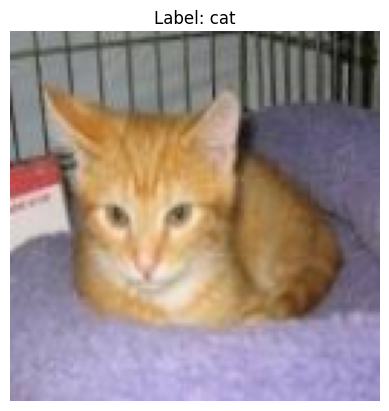

In [13]:
image_array, label = data[0]
plt.imshow(image_array)
plt.title("Label: {}".format("cat" if label == 0 else "dog"))
plt.axis('off')
plt.show()

### Plotting some random images

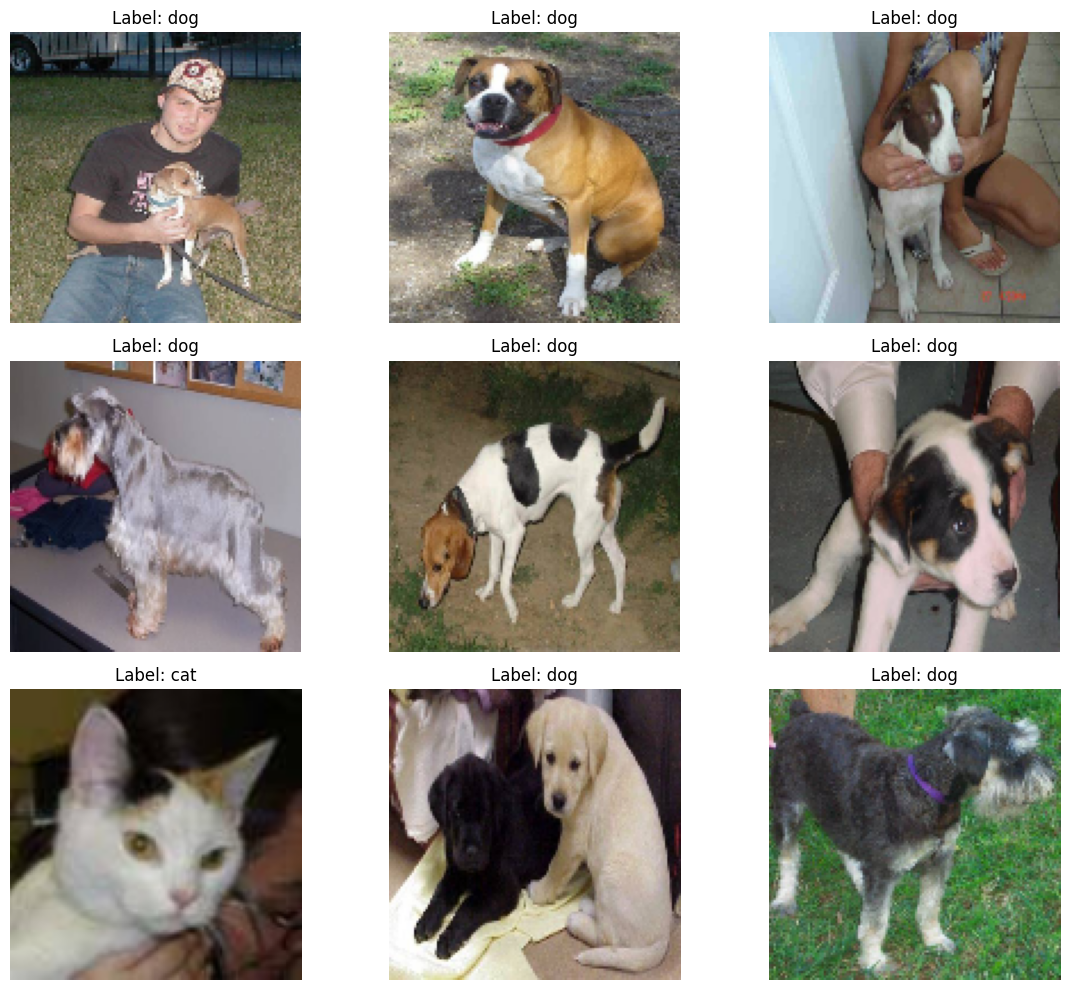

In [14]:
num_images = 9
random_idx = np.random.randint(0, len(data), size=num_images) # random indices
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

for i, idx in enumerate(random_idx):
    image_array, label = data[idx]
    image_array = image_array.astype('uint8')
    # position in the subplot grid
    row = i // 3
    col = i % 3
    axes[row, col].imshow(image_array)
    axes[row, col].set_title("Label: {}".format("cat" if label == 0 else "dog"))
    axes[row, col].axis('off')
plt.tight_layout()
plt.show()

## Part 4 - Splitting data into Training, Validation and Testing data

In our neural network we can have multiple layers where we can do many operations (transfer functions). We can apply techniques to the images: Convolution, Pooling , Padding to optimize and scale down the images.. 
We have input (numbers in matrix) after doing before mentioned operations in the layer then we (multiply the value x to a weight) + bias. Then we run through an activtion function.
Weights must be static in the end, meaning we iterate (back propagate) untill we end up on something stable. 
Depending on the error rate, we either lower them or higher them in increments (learning rate) - this is where e.g. ADAM comes in:
The Adam optimizer, short for “Adaptive Moment Estimation,” is an iterative optimization algorithm used to minimize the loss function during the training of neural networks. One cycle of this is called epocs.

In [15]:
# Split data into features (X) and labels (y)
X = []
y = []
for features, label in data:
    X.append(features)
    y.append(label)

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) # Split data into training and validation sets

# Normalize
X_train = X_train / 255.0
X_val = X_val / 255.0

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (16000, 128, 128, 3)
y_train shape: (16000,)
X_val shape: (4000, 128, 128, 3)
y_val shape: (4000,)


In [16]:
# Split test data into features (X_test) and labels (y_test)
X_test = []
y_test = []
for features, label in test_data:
    X_test.append(features)
    y_test.append(label)

# Convert lists to numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

# Normalize pixel values
X_test = X_test / 255.0

# Print shapes of test data
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (5000, 128, 128, 3)
y_test shape: (5000,)


We can chose from different activation functions, we do...

In [22]:
# create CNN model with 3 convolutional layers - first layer with 32 filters, second 64 filter and third 128
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding="valid", activation="relu", input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

model.add(Conv2D(64, kernel_size=(3,3), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

model.add(Conv2D(128, kernel_size=(3,3), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,312,961 (12.64 MB)

 Trainable params: 3,312,961 (12.64 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
epochs = 10
learning_rate = 0.001
validation_split=0.1

In [25]:
model.compile(optimizer=Adam(learning_rate=learning_rate), loss="binary_crossentropy", metrics=["accuracy"])

Now onto fitting the model using 90% for train, 10% for validation

In [26]:
history = model.fit(X_train, y_train, epochs=10, validation_split=validation_split, validation_data=(X_val, y_val))

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 66s 131ms/step - accuracy: 0.5872 - loss: 0.6642 - val_accuracy: 0.7210 - val_loss: 0.5619
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 59s 118ms/step - accuracy: 0.7337 - loss: 0.5293 - val_accuracy: 0.7293 - val_loss: 0.5213
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 59s 117ms/step - accuracy: 0.7995 - loss: 0.4325 - val_accuracy: 0.8050 - val_loss: 0.4250
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 58s 117ms/step - accuracy: 0.8466 - loss: 0.3488 - val_accuracy: 0.8075 - val_loss: 0.4365
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 58s 117ms/step - accuracy: 0.8913 - loss: 0.2578 - val_accuracy: 0.8382 - val_loss: 0.3935
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 58s 116ms/step - accuracy: 0.9301 - loss: 0.1714 - val_accuracy: 0.8328 - val_loss: 0.4365
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 60s 119ms/step - accuracy: 0.9618 - loss: 0.0964 - val_accuracy: 0.8288 - val_loss: 0.5744
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 60s 120ms/step - accuracy: 0.9767 - loss: 0

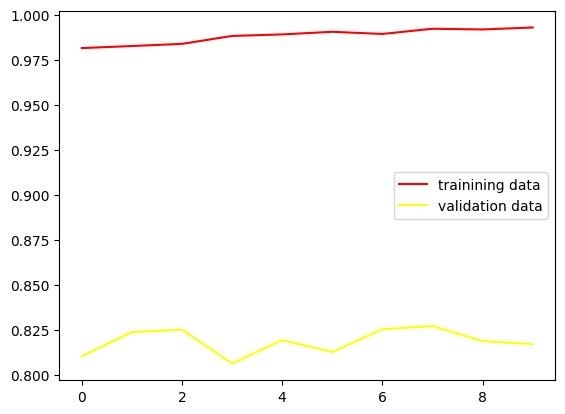

In [19]:
# Validation 1
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color="red", label="trainining data")
plt.plot(history.history["val_accuracy"], color="yellow", label="validation data")
plt.legend()
plt.show()

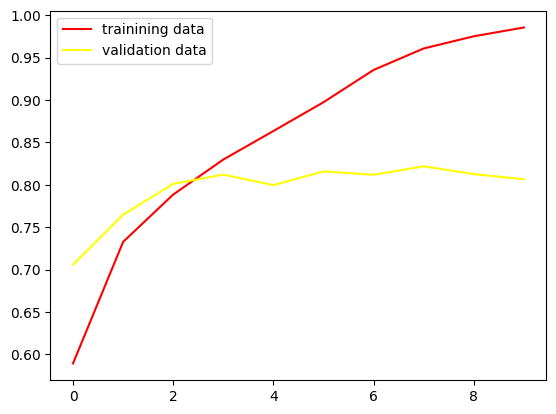

In [48]:
# Validation 2
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color="red", label="trainining data")
plt.plot(history.history["val_accuracy"], color="yellow", label="validation data")
plt.legend()
plt.show()

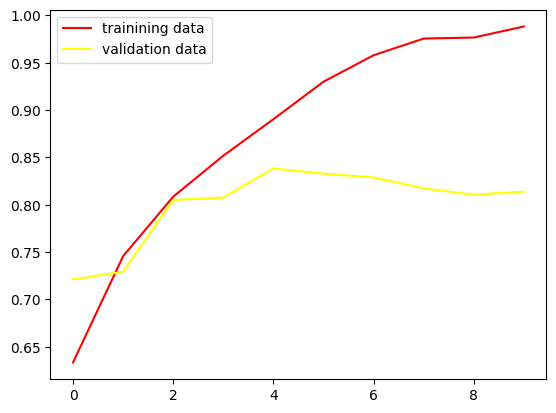

In [34]:
# Validation 3
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color="red", label="trainining data")
plt.plot(history.history["val_accuracy"], color="yellow", label="validation data")
plt.legend()
plt.show()

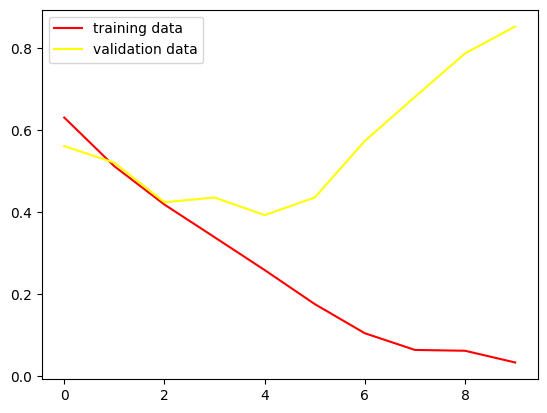

In [35]:
plt.plot(history.history["loss"], color="red", label="training data")
plt.plot(history.history["val_loss"], color="yellow", label="validation data")
plt.legend()
plt.show()

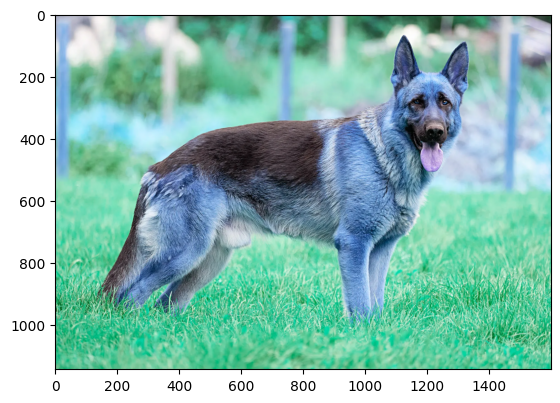

In [53]:
# testing on a random dog found on google
test_img = cv2.imread("randomdog.png")
plt.imshow(test_img)

In [54]:
test_img.shape

(1144, 1600, 3)

In [55]:
test_img = cv2.resize(test_img, (128, 128))

In [56]:
test_input = test_img.reshape((1, 128, 128, 3))

In [57]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[1.]], dtype=float32)

We see that for the dog image it correctly predicts it to be a dog.

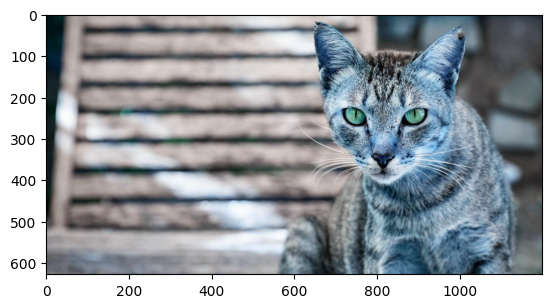

In [58]:
# testing on a random cat found on google
test_img2 = cv2.imread("randomcat.png")
plt.imshow(test_img2)

In [59]:
test_img2.shape

(628, 1200, 3)

In [60]:
test_img2 = cv2.resize(test_img2, (128, 128))

In [61]:
test_input2 = test_img2.reshape((1, 128, 128, 3))

In [62]:
model.predict(test_input2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[0.]], dtype=float32)

We see that for the cat image it correctly predicts it to be a cat with a value close to 0.

157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step


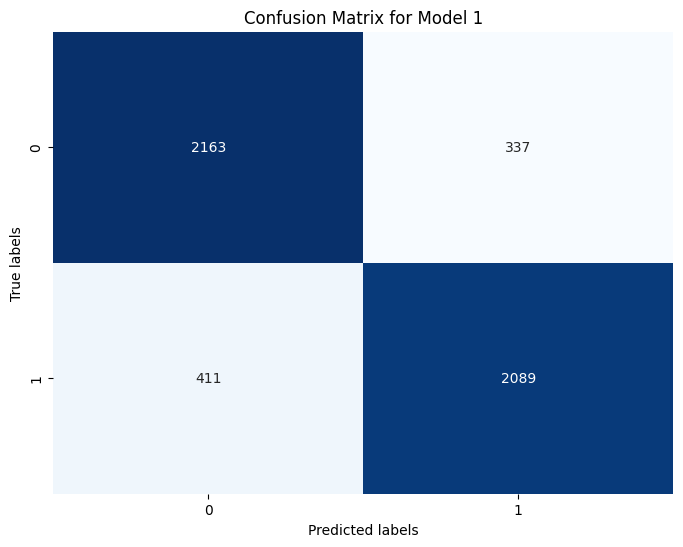

In [52]:
# Assessing the quality of the model
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the testing data using the first model
y_pred = model.predict(X_test)
y_pred_labels = np.round(y_pred)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Model 1')
plt.show()

We see:
- 2163 True Cats
- 337 False Cats
- 411 False Dogs
- 2089 True Dogs

In [44]:
# Data augmentation
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Load training and validation data using generators
train_generator = train_datagen.flow_from_directory(
    './train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    './test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 20000 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [45]:
# Learning rate scheduler
def lr_schedule(epoch):
    initial_lr = 0.001
    if epoch < 5:
        return initial_lr
    elif epoch < 10:
        return initial_lr * 0.1
    else:
        return initial_lr * 0.01

In [48]:
lr_scheduler = LearningRateScheduler(lr_schedule)

In [49]:
# Compile the model with optimizer and loss
learning_rate = 0.001
model.compile(optimizer=Adam(learning_rate=learning_rate), loss="binary_crossentropy", metrics=["accuracy"])

In [50]:
# Train the model with data generators
history2 = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[lr_scheduler]
)

Epoch 1/15


/opt/homebrew/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.7954 - loss: 0.5004

ValueError: Must provide at least one structure

In [30]:
# Save the entire model to a single file
model.save("my_model.h5")

In [31]:
# Loading
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("my_model.h5")

# Discussion
- **Based on your experience, how would you define ANN and CNN?**
- **Which hyper-parameters of the CNN architecture have you fine-tuned?**
- **Which is the role of the activation functions in ANN? Which of them you have implemented? Illustrate them.**
- **Can you see any advantages and disadvantages of ANN and CNN used for classification in
comparison to the other classification algorithms you are familiar with? Give some examples.**